# Física Aplicada à Computação

## Projeto Epoca de Finalistas

### Licenciatura em Engenharia Informática - Ano Lectivo 2022-2023

#### Fábio Gonçalves - 17646

#### João Portelinha - 20481

#### Docente: Nuno Pereira

##### Arduinos Nano 33 BLE Sense

Neste relatorio iremos apresentar as soluções para o Projeto de Epoca de Finalistas que nos foi proposto pelo docente da cadeira de Física Aplicada a Computação.

Os objetivos deste projeto eram os seguintes:
- Gerar dados de todos os sensores em ambos os Arduinos;
- Ler esses mesmos dados em Python;
- Calcular médias, desvio padrão, maximos e minimos;
- Visualizar em graficos usando o matplotlib;
- Gravar os dados num ficheiro em formato .json;
- Enviar esse mesmo ficheiro um para o outro por email atraves de Python;
- Apresentar os graficos numa pagina web.


### Importante
Começar por correr este bloco de codigo que irá iniciar os imports necessarios para o resto do relatorio e realizar a ligação ao arduino!

In [77]:
import serial
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import time

port = !python -m serial.tools.list_ports
print('Portas COM disponível:', port)
if (port[0] != "no ports found"):
      arduino = serial.Serial()
      arduino.port = 'COM5'
      arduino.baudrate = 9600
      arduino.timeout = 5
      print("Ligação ao Arduino Estabelecida na", arduino.port)  
else:
       print("Erro ao estabelecer ligação com o Arduino")


Portas COM disponível: ['COM1                ', 'COM5                ', '2 ports found']
Ligação ao Arduino Estabelecida na COM5


#### Aquisição de Dados

In [78]:
iterations = int(input('Número de séries de aquisição: '))
#iterations = 200

arduino.open()
#arduino.write(bytes([1]))

data = []
data.append("Temperatura(°C) Humidade(%) Pressão(kPa) Proximidade Aceleração(G) Temperatura Efetiva Temperatura na Pele")
count = 0

print('A adquirir os dados...')

task = True

#time_start = time.time()

while task:
    
    line = str(arduino.readline())
    reading = line[2:-5]
    data.append(reading)
    count +=1
    time.sleep(60) # TODO - Meter o delay no codigo do arduino
    if (count == iterations):
        print("\nDados obtidos com sucesso.".format(iterations))
        task = False

#time_end = time.time()
arduino.close()

A adquirir os dados...

Dados obtidos com sucesso.


Dados lidos com sucesso!


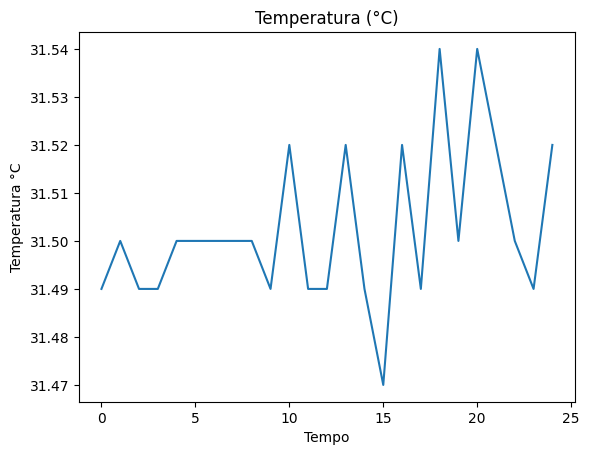

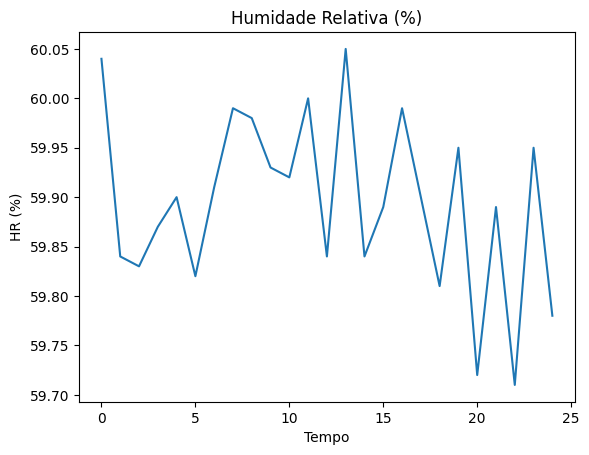

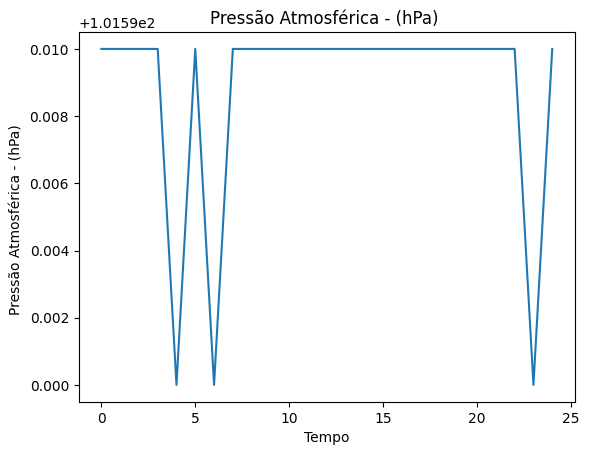

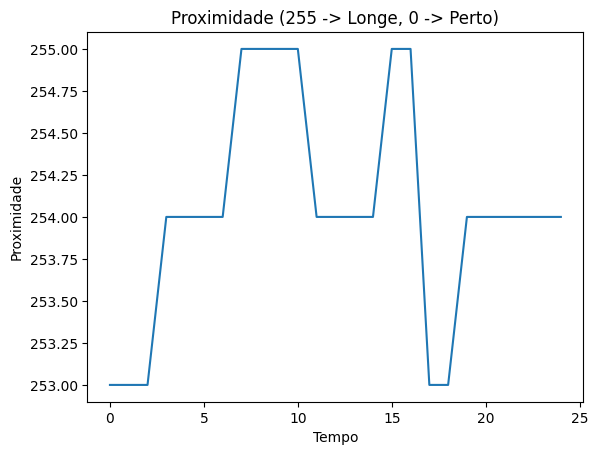

Text(0, 0.5, 'Acelearacao em Z')

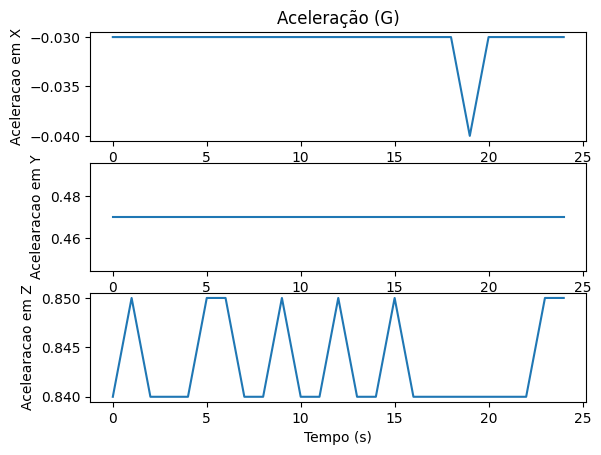

In [79]:
temp_data = []
hr_data = []
p_data  = []
prox_data = []
acc_data = []
x_acc = []
y_acc = []
z_acc = []
eff_temp = []
skin_temp = []

data = data[1:] # Skip primeira linha

for line in data:
    temp, hr, p, prox, acc, et, st = line.split()
    temp_data.append(float(temp))
    hr_data.append(float(hr))
    p_data.append(float(p))
    prox_data.append(float(prox))
    acc_data.append(acc)
    acc_string = acc.split(",")
    x_acc.append(float(acc_string[0]))
    y_acc.append(float(acc_string[1]))
    z_acc.append(float(acc_string[2]))
    eff_temp.append(float(et))
    skin_temp.append(float(st))

print("Dados lidos com sucesso!")

# Grafico da temperatura
plt.title('Temperatura (°C)')
plt.xlabel("Tempo")
plt.ylabel("Temperatura °C")
plt.plot(temp_data)
plt.show()

# Grafico da humidade
plt.title('Humidade Relativa (%)')
plt.xlabel("Tempo")
plt.ylabel("HR (%)")
plt.plot(hr_data)
plt.show()

# Grafico da Pressão Atmosferica
plt.title('Pressão Atmosférica - (hPa) ')
plt.xlabel("Tempo")
plt.ylabel("Pressão Atmosférica - (hPa) ")
plt.plot(p_data)
plt.show()

# Grafico de Proximidade
plt.title('Proximidade (255 -> Longe, 0 -> Perto)')
plt.xlabel("Tempo")
plt.ylabel("Proximidade")
plt.plot(prox_data)
plt.show()

# Grafico de Aceleração
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(x_acc)
plt.title('Aceleração (G)')
plt.ylabel('Aceleracao em X')

plt.subplot(3, 1, 2)
plt.plot(y_acc)
plt.xlabel('Tempo (s)')
plt.ylabel('Acelearacao em Y')

plt.subplot(3, 1, 3)
plt.plot(z_acc)
plt.xlabel('Tempo (s)')
plt.ylabel('Acelearacao em Z')
